In [94]:
import pandas as pd 
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [64]:
df_wine_red = pd.read_csv("winequality-red.csv", sep=";")


In [65]:
df_wine_red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [66]:
df_wine_red.shape

(1599, 12)

In [67]:
df_wine_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [68]:
df_wine_red.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

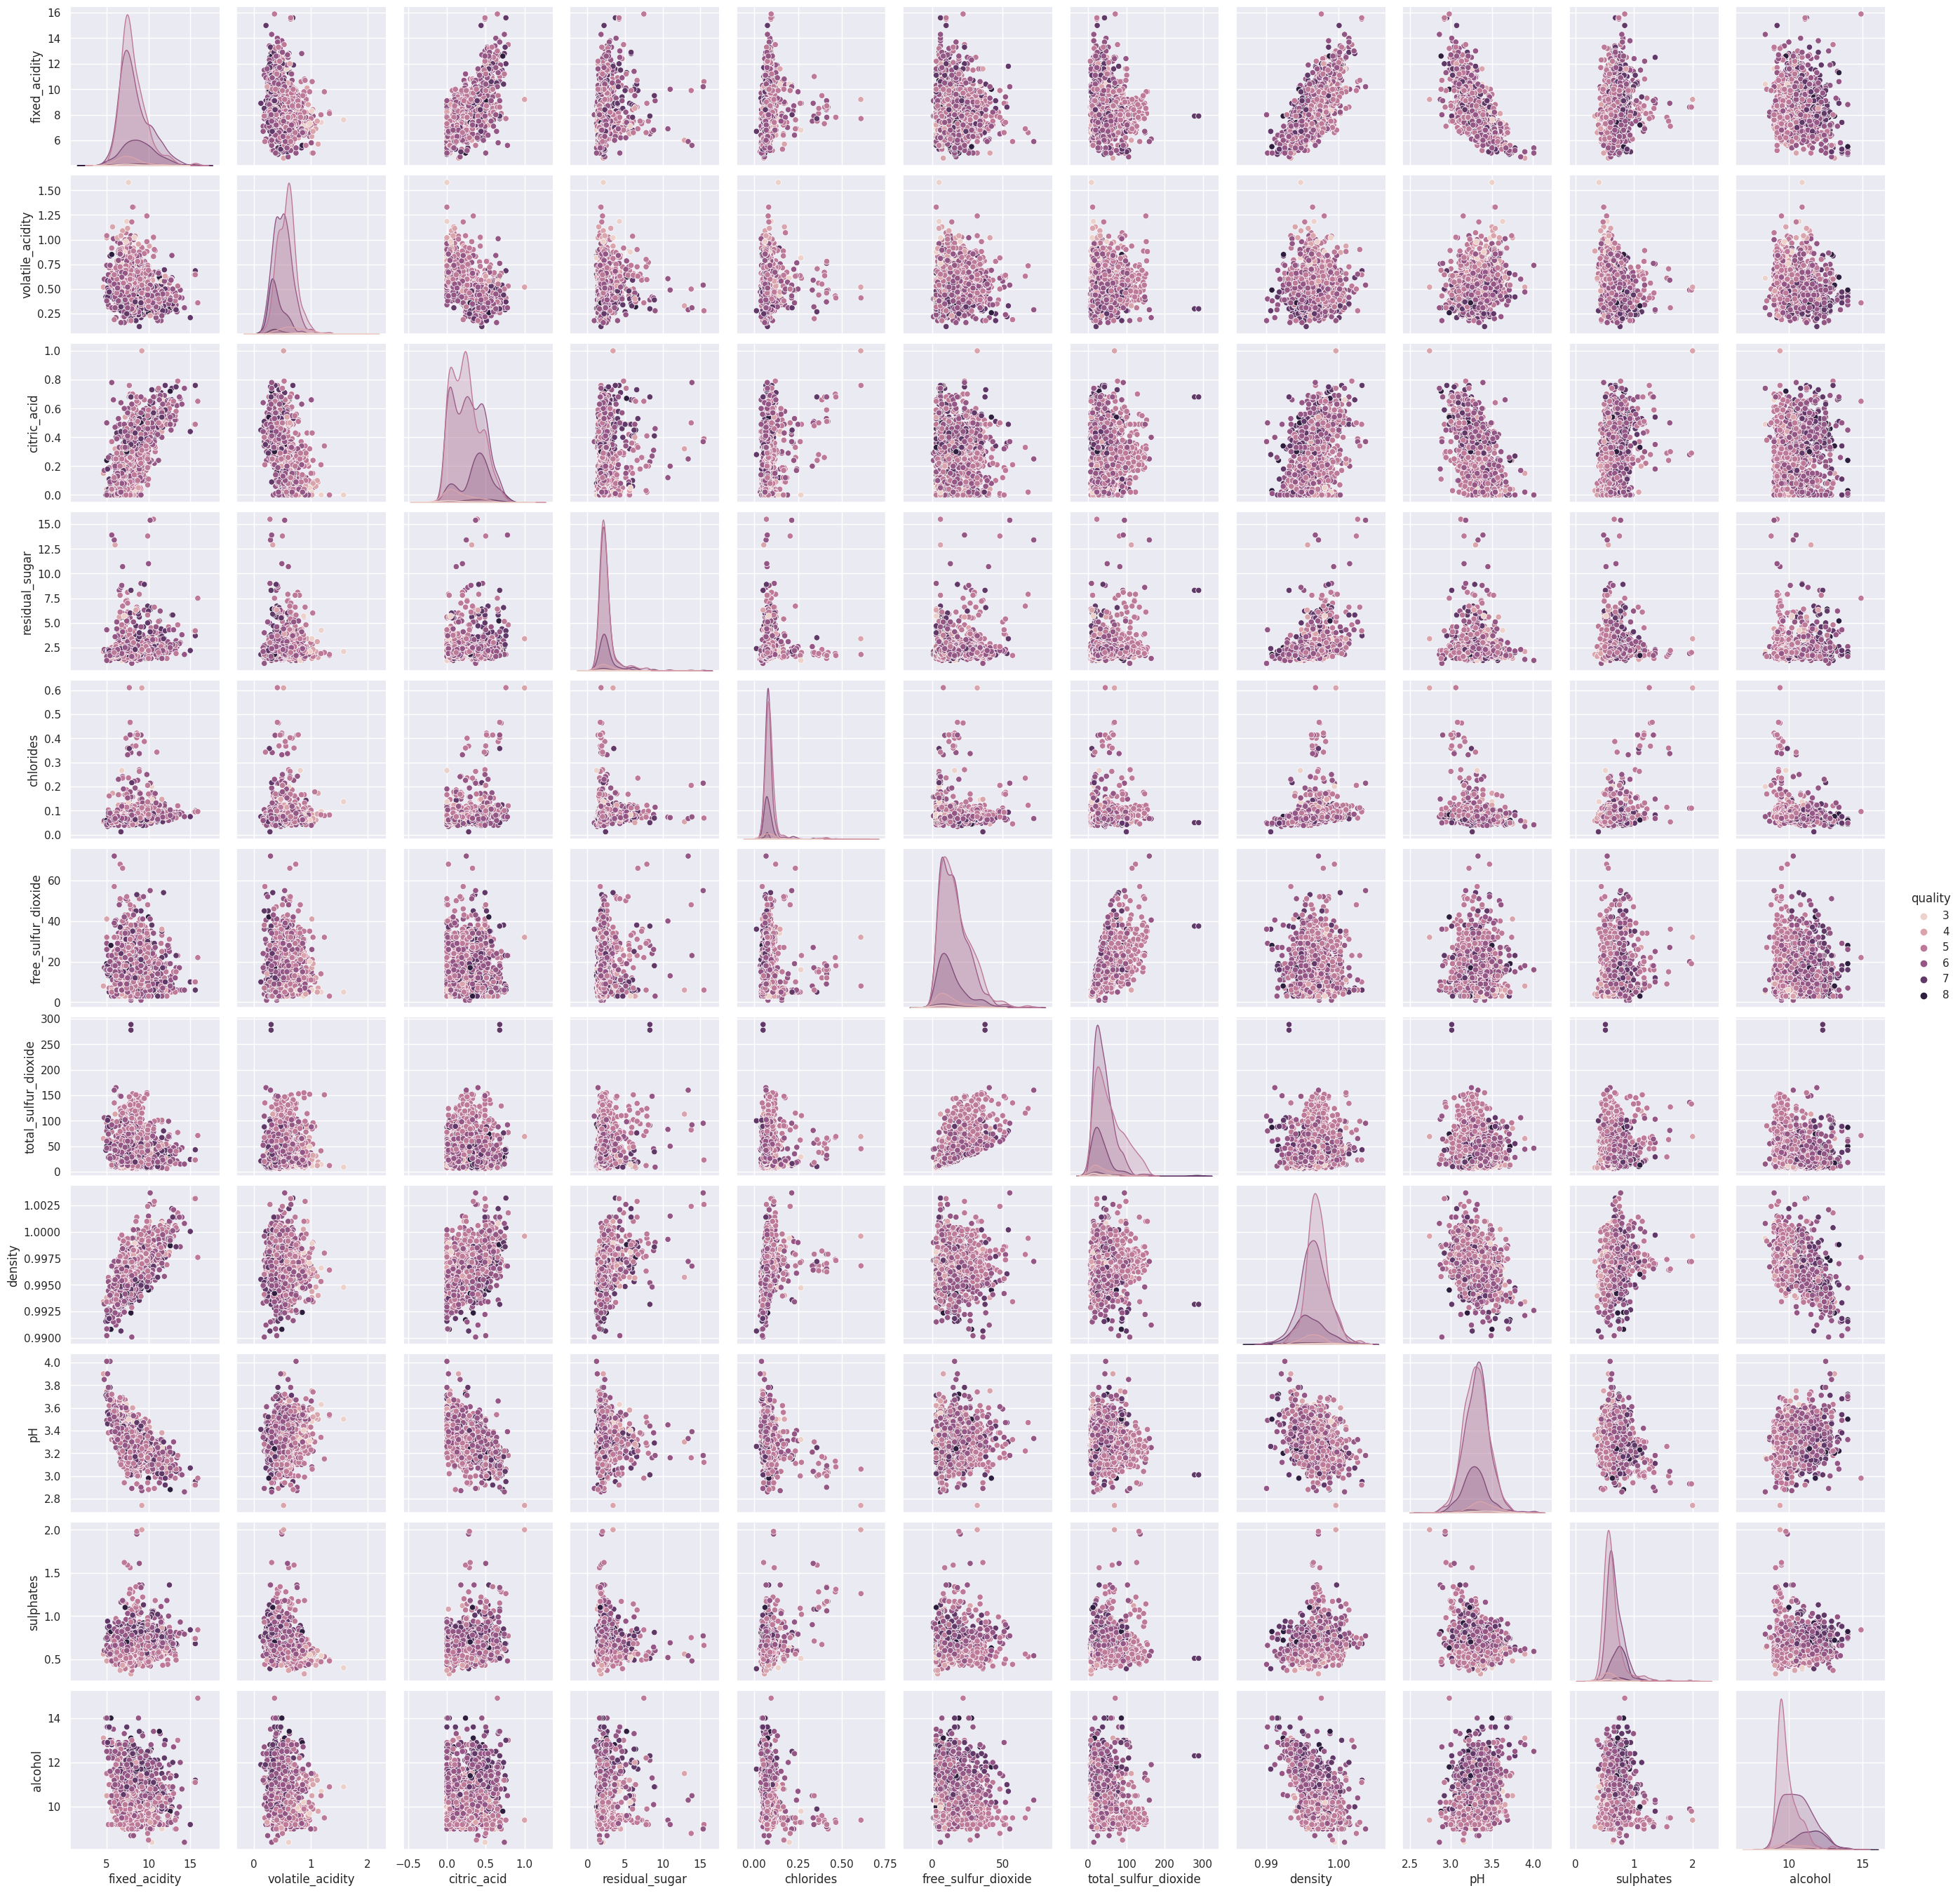

In [69]:

df_wine_red.columns= ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']


sns.pairplot(df_wine_red, hue='quality', vars=df_wine_red.columns[:-1])
plt.show()    

<AxesSubplot: >

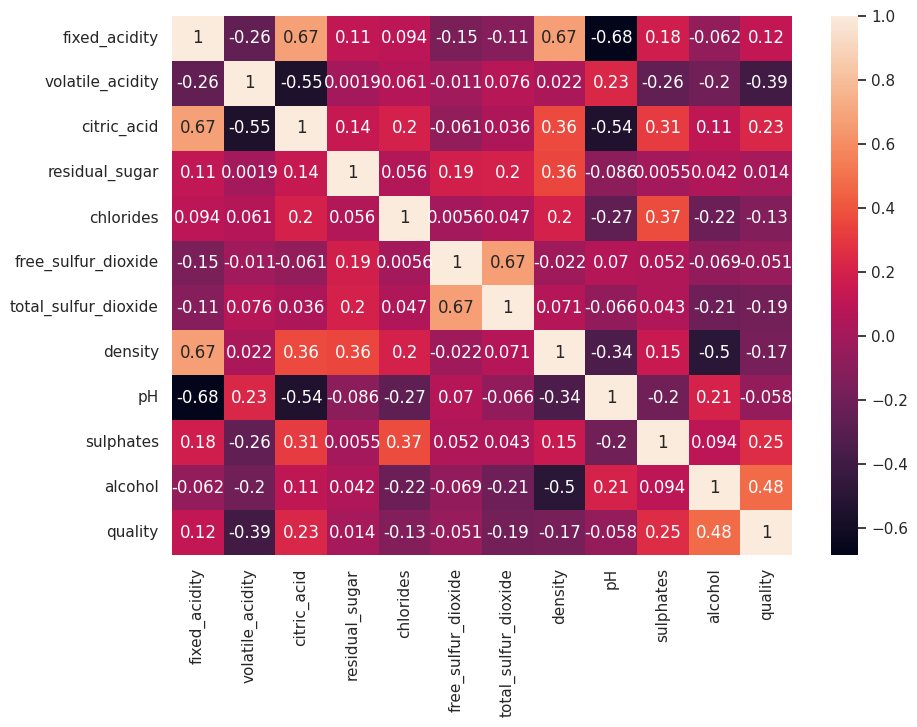

In [70]:
sns.set(rc={'figure.figsize':(10,7)})
sns.heatmap(df_wine_red.corr(),annot=True)

<AxesSubplot: xlabel='quality', ylabel='residual_sugar'>

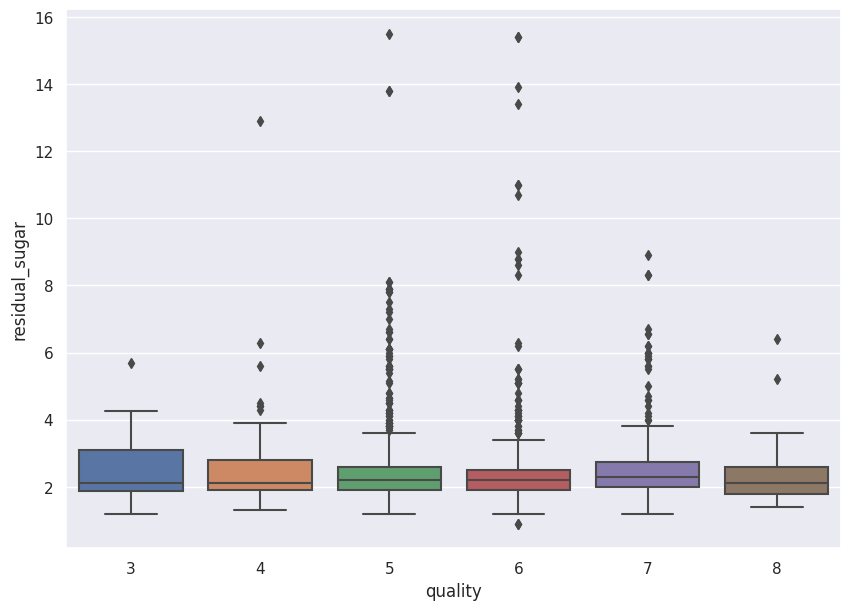

In [71]:
sns.boxplot(y = df_wine_red['residual_sugar'], x=df_wine_red['quality'])

<AxesSubplot: ylabel='residual_sugar'>

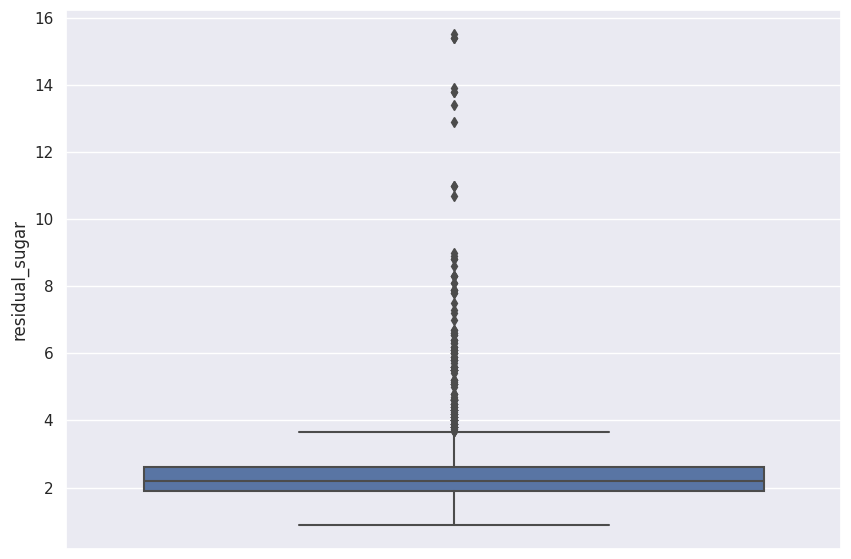

In [72]:
sns.boxplot(y = df_wine_red['residual_sugar'])

<AxesSubplot: xlabel='quality', ylabel='chlorides'>

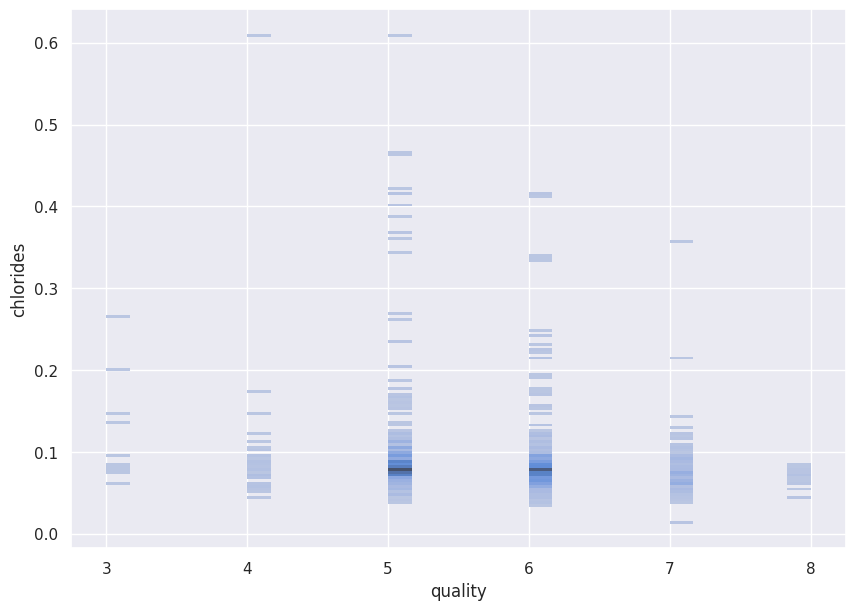

In [73]:
sns.histplot(y = df_wine_red['chlorides'], x=df_wine_red['quality'])

<AxesSubplot: xlabel='quality', ylabel='chlorides'>

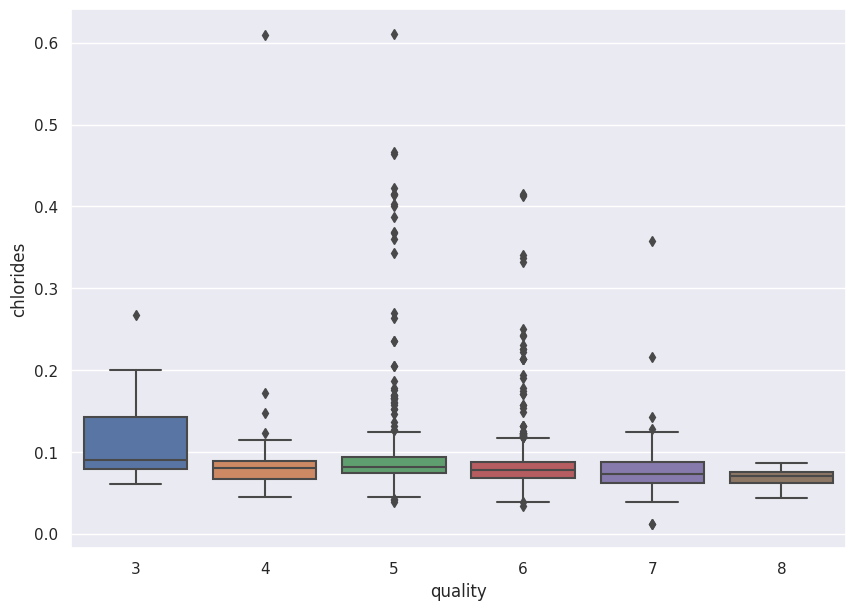

In [74]:
sns.boxplot(y = df_wine_red['chlorides'], x=df_wine_red['quality'])

In [75]:
df_wine_white = pd.read_csv("winequality-white.csv", sep=";")


In [76]:
df_wine_white.shape

(4898, 12)

In [77]:
df_wine_red.columns = df_wine_white.columns

In [78]:
df_wine_white.describe

<bound method NDFrame.describe of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.0

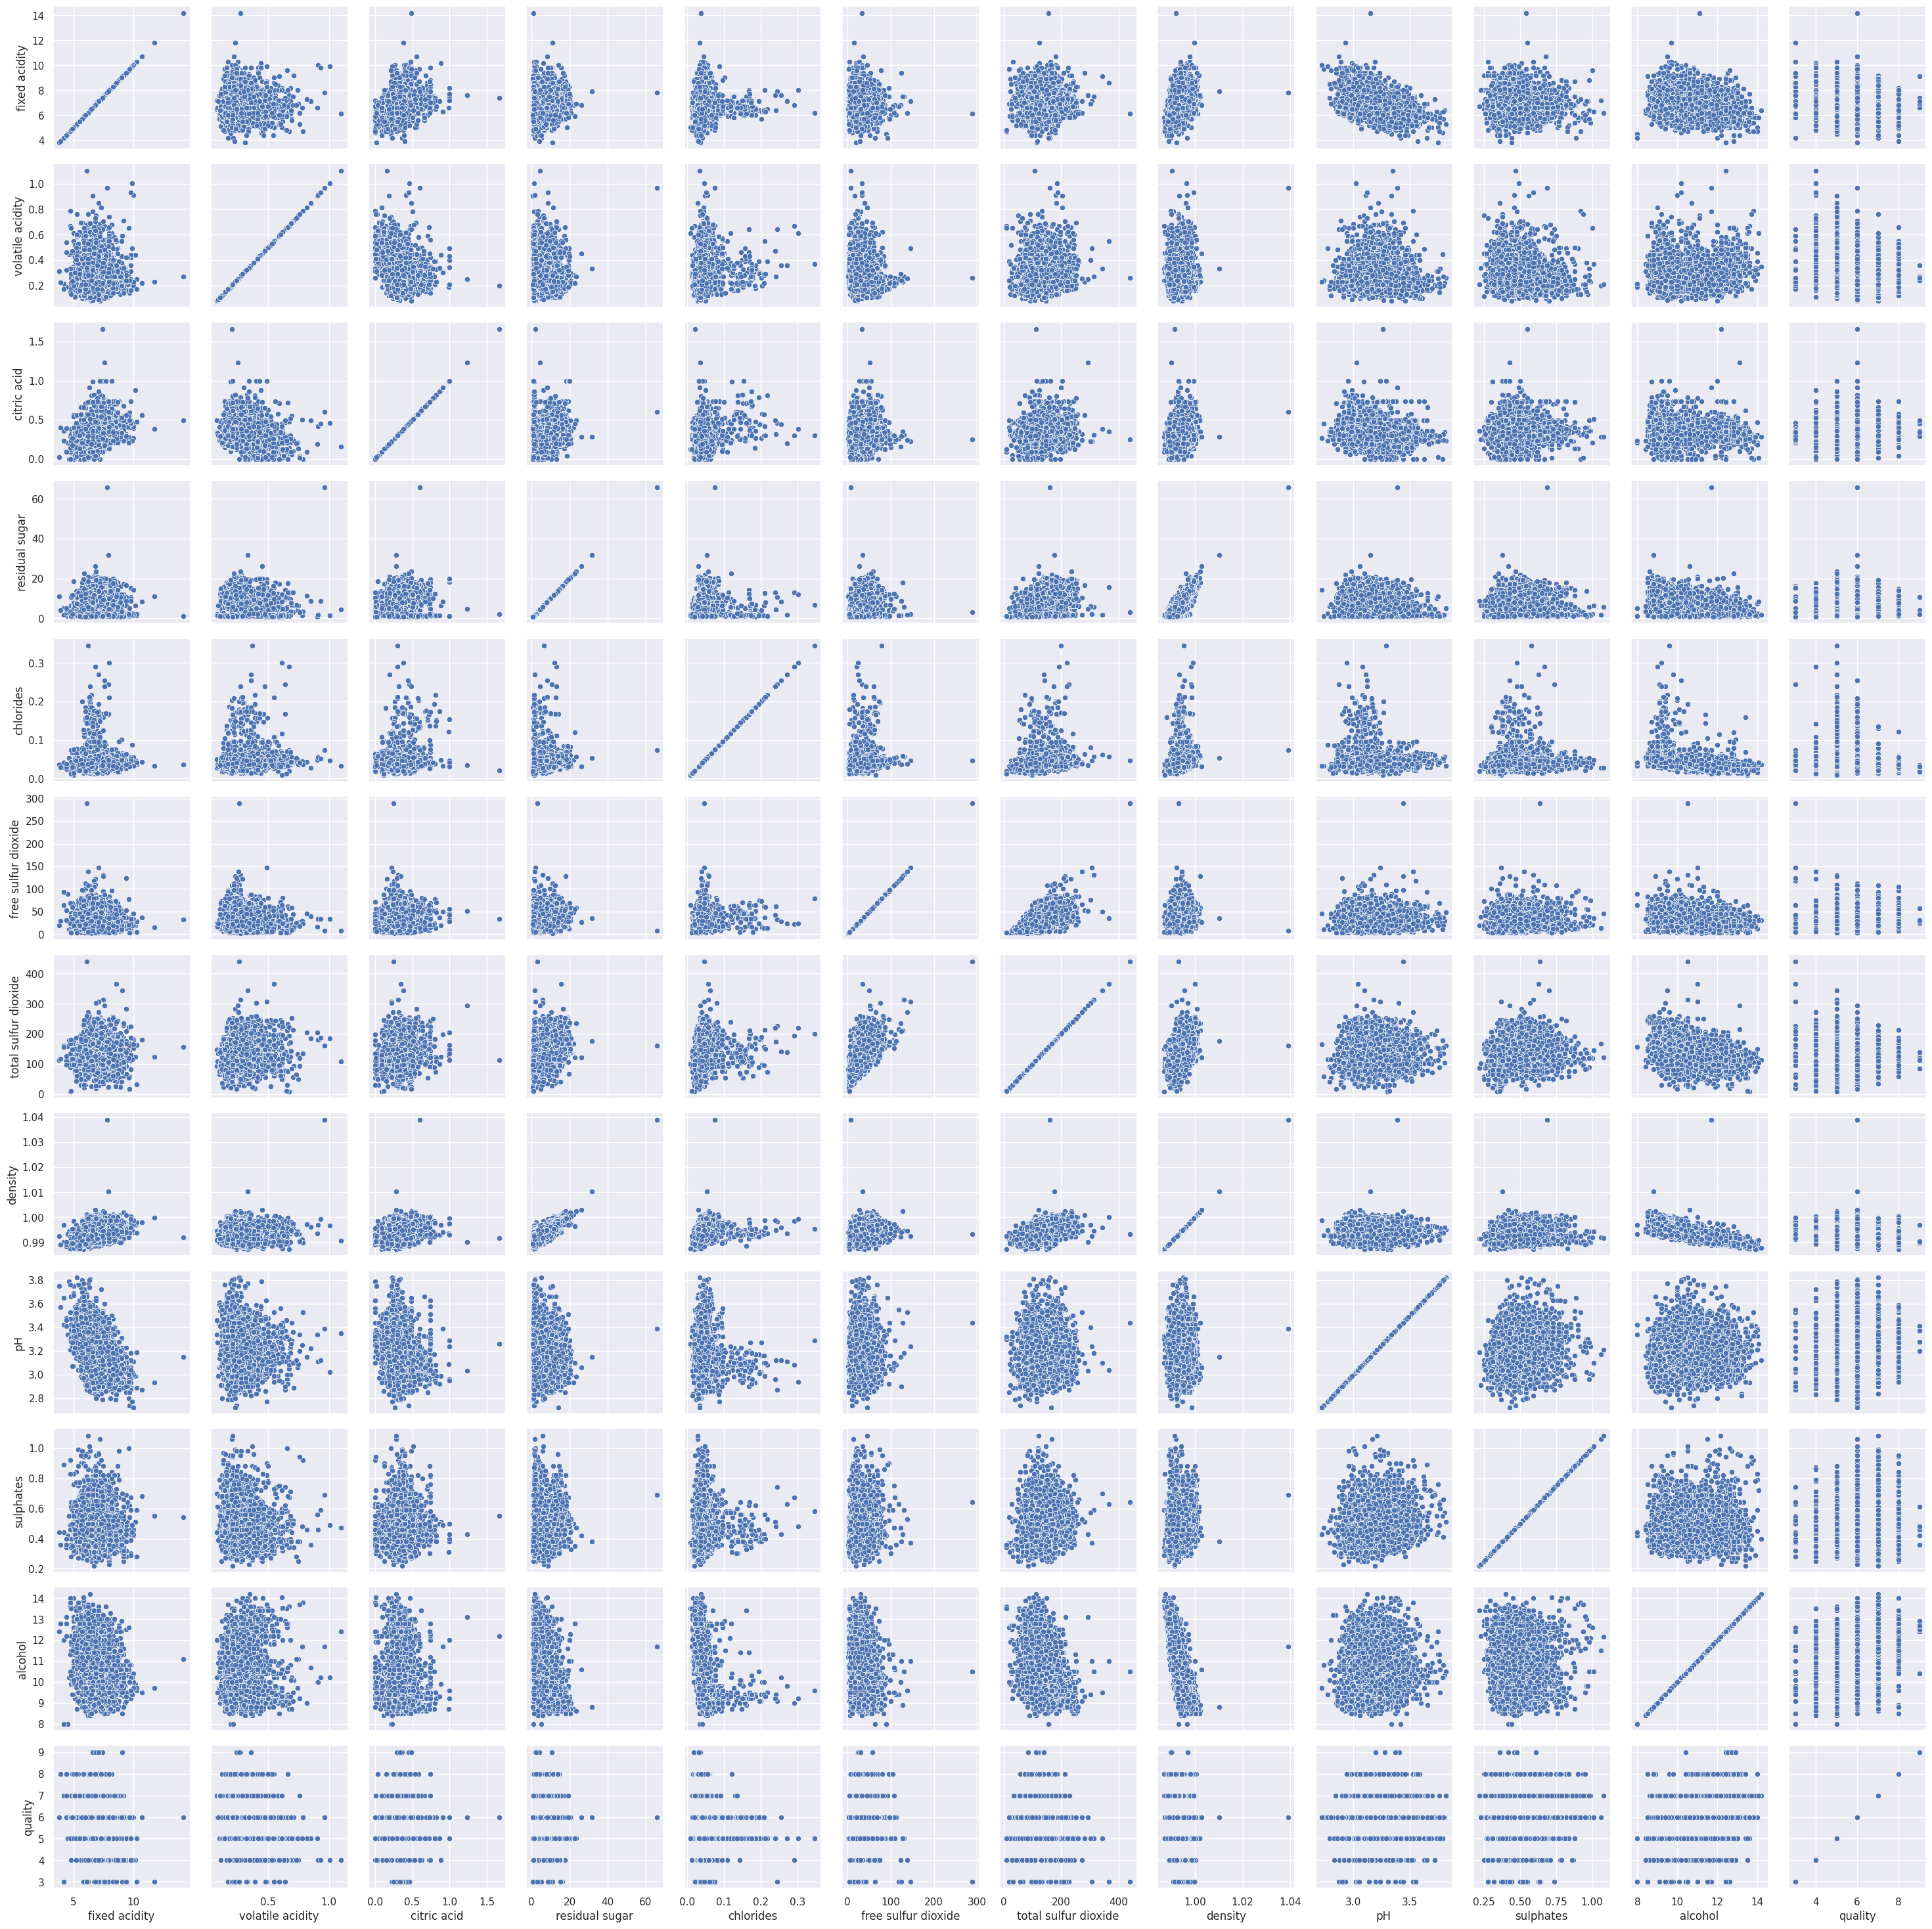

In [79]:
g = sns.PairGrid(df_wine_white)
g = g.map(sns.scatterplot)

<AxesSubplot: >

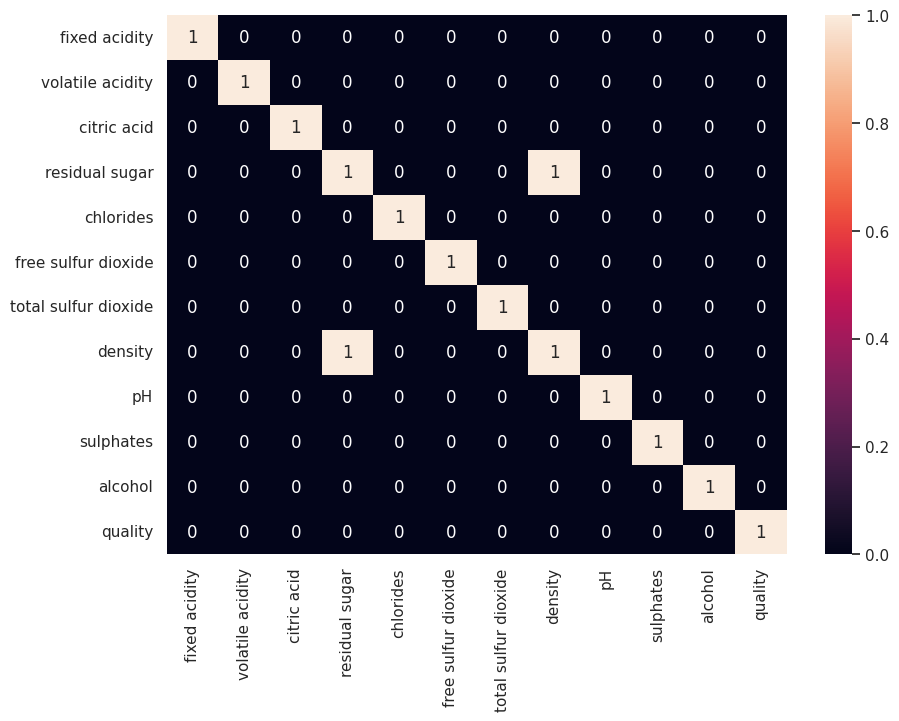

In [80]:
sns.heatmap(df_wine_white.corr()>0.7, annot=True)

## Create a red wine model

In [81]:
X_train_r,X_test_r,y_train_r,y_test_r = train_test_split(df_wine_red.drop('quality', axis=1),df_wine_red['quality'],test_size=0.3, random_state=40)

In [82]:
sc = StandardScaler()
sc_fit = sc.fit(X_train_r)
X_train_r_sc = sc_fit.transform(X_train_r)
X_test_r_sc = sc_fit.transform(X_test_r)

In [83]:
X_scaled = pd.DataFrame(X_train_r_sc, columns=X_train_r.columns)

array([[<AxesSubplot: title={'center': 'fixed acidity'}>,
        <AxesSubplot: title={'center': 'volatile acidity'}>,
        <AxesSubplot: title={'center': 'citric acid'}>],
       [<AxesSubplot: title={'center': 'residual sugar'}>,
        <AxesSubplot: title={'center': 'chlorides'}>,
        <AxesSubplot: title={'center': 'free sulfur dioxide'}>],
       [<AxesSubplot: title={'center': 'total sulfur dioxide'}>,
        <AxesSubplot: title={'center': 'density'}>,
        <AxesSubplot: title={'center': 'pH'}>],
       [<AxesSubplot: title={'center': 'sulphates'}>,
        <AxesSubplot: title={'center': 'alcohol'}>, <AxesSubplot: >]],
      dtype=object)

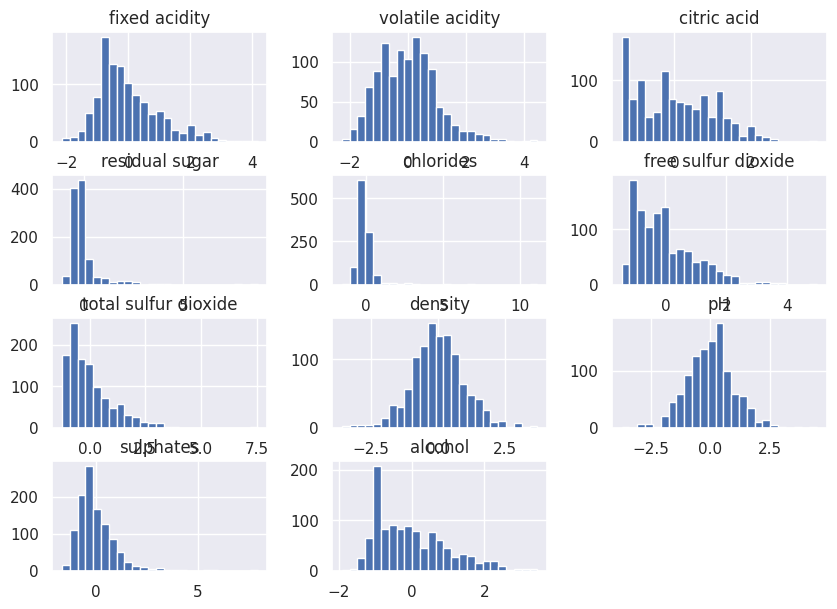

In [84]:
X_scaled.hist(bins=25)

array([[<AxesSubplot: title={'center': 'fixed acidity'}>,
        <AxesSubplot: title={'center': 'volatile acidity'}>,
        <AxesSubplot: title={'center': 'citric acid'}>],
       [<AxesSubplot: title={'center': 'residual sugar'}>,
        <AxesSubplot: title={'center': 'chlorides'}>,
        <AxesSubplot: title={'center': 'free sulfur dioxide'}>],
       [<AxesSubplot: title={'center': 'total sulfur dioxide'}>,
        <AxesSubplot: title={'center': 'density'}>,
        <AxesSubplot: title={'center': 'pH'}>],
       [<AxesSubplot: title={'center': 'sulphates'}>,
        <AxesSubplot: title={'center': 'alcohol'}>, <AxesSubplot: >]],
      dtype=object)

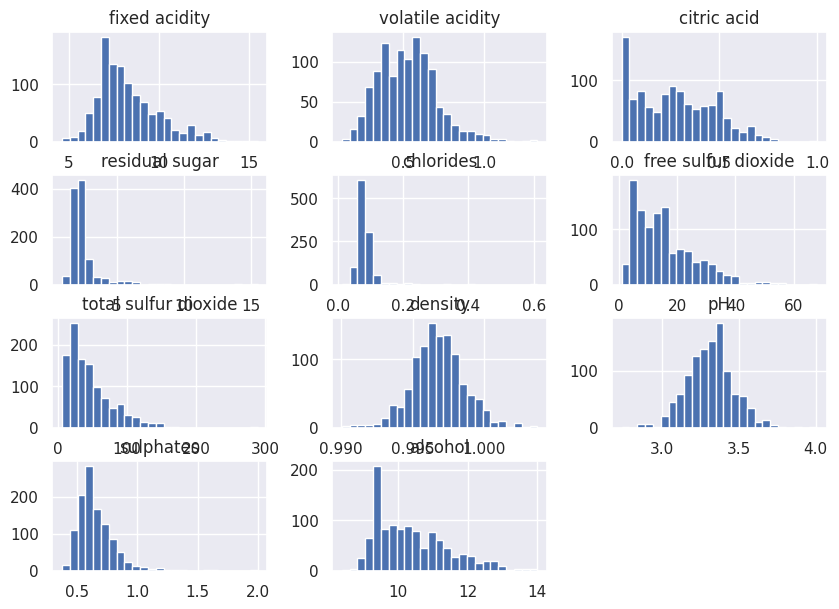

In [85]:
X_train_r.hist(bins=25)

In [86]:
model = LinearRegression()

In [87]:
model.fit(X_train_r, y_train_r)

LinearRegression()

In [88]:
print(model.coef_)

[ 5.52394781e-02 -1.00820070e+00 -2.33315386e-01  1.68655558e-02
 -1.75502441e+00  4.72133726e-03 -3.62654130e-03 -2.16629531e+01
 -2.61069037e-01  7.90383899e-01  2.68494823e-01]


In [89]:
print(model.intercept_)

25.114429262842442


In [90]:
pd.DataFrame(model.coef_, X_train_r.columns, columns = ['Coeff'])

Coeff
fixed acidity          0.055239
volatile acidity      -1.008201
citric acid           -0.233315
residual sugar         0.016866
chlorides             -1.755024
free sulfur dioxide    0.004721
total sulfur dioxide  -0.003627
density              -21.662953
pH                    -0.261069
sulphates              0.790384
alcohol                0.268495

In [91]:
predictions = model.predict(X_test_r)

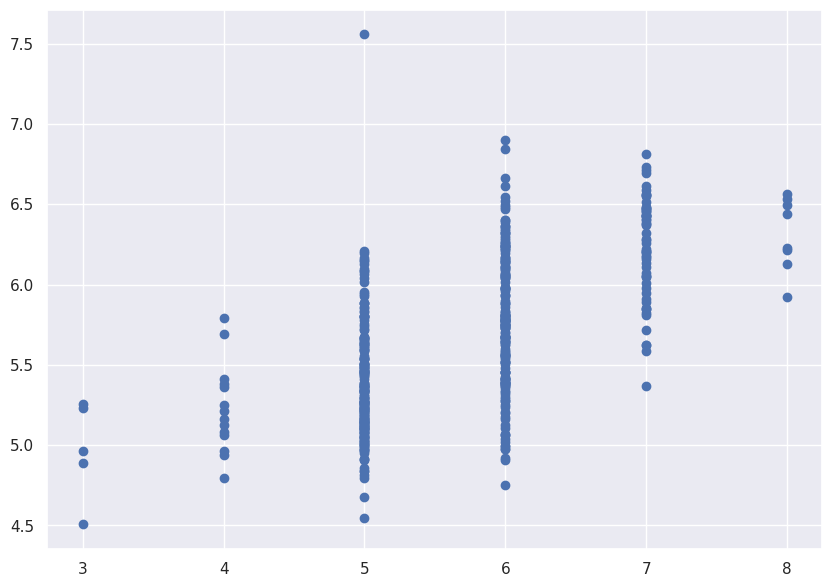

In [95]:
plt.scatter(y_test_r, predictions)

In [96]:

metrics.mean_absolute_error(y_test_r, predictions)

0.5062816964649819

In [97]:
metrics.mean_squared_error(y_test_r, predictions)


0.42805373920034123

In [98]:
np.sqrt(metrics.mean_squared_error(y_test_r, predictions))

0.6542581594449864